In [534]:
import pandas as pd

df = pd.read_csv("patient_dataset.csv")

In [535]:
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker


In [536]:
df.shape

(6000, 16)

In [537]:
df.columns

Index(['age', 'gender', 'chest_pain_type', 'blood_pressure', 'cholesterol',
       'max_heart_rate', 'exercise_angina', 'plasma_glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'residence_type', 'smoking_status'],
      dtype='object')

In [538]:
df.describe()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease
count,6000.000000,5528.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,5391.000000,5386.000000,5432.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,53.657833,0.497648,2.518500,134.277167,209.844667,144.996000,0.503167,161.119644,59.964723,129.601252,29.941495,1.294623,0.501333,0.498167
std,21.018382,0.500040,1.124071,48.303001,52.840432,43.583318,0.500032,52.434693,23.264030,29.207479,11.626425,0.689932,0.500040,0.500038
min,18.000000,0.000000,1.000000,0.000000,120.000000,70.000000,0.000000,70.000000,20.000000,80.000000,10.006670,0.100068,0.000000,0.000000
25%,36.000000,0.000000,2.000000,109.000000,164.000000,108.000000,0.000000,116.000000,40.000000,105.000000,19.797401,0.690522,0.000000,0.000000
50%,53.000000,0.000000,3.000000,135.000000,210.000000,144.000000,1.000000,162.000000,60.000000,129.000000,29.940303,1.294057,1.000000,0.000000
75%,72.000000,1.000000,4.000000,161.000000,257.000000,183.000000,1.000000,206.000000,80.000000,155.000000,39.859571,1.899079,1.000000,1.000000
max,90.000000,1.000000,4.000000,300.000000,300.000000,220.000000,1.000000,250.000000,100.000000,180.000000,49.999449,2.499635,1.000000,1.000000


In [539]:
df.dtypes

age                    int64
gender               float64
chest_pain_type        int64
blood_pressure         int64
cholesterol            int64
max_heart_rate         int64
exercise_angina        int64
plasma_glucose       float64
skin_thickness       float64
insulin              float64
bmi                  float64
diabetes_pedigree    float64
hypertension           int64
heart_disease          int64
residence_type        object
smoking_status        object
dtype: object

In [540]:
df.isna().sum()

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64

In [541]:
df.dropna(inplace = True)

In [542]:
df.shape

(3734, 16)

In [543]:
df['heart_disease'].value_counts()

heart_disease
1    1891
0    1843
Name: count, dtype: int64

In [544]:
df.groupby('residence_type')['heart_disease'].value_counts()

residence_type  heart_disease
Rural           1                954
                0                907
Urban           1                937
                0                936
Name: count, dtype: int64

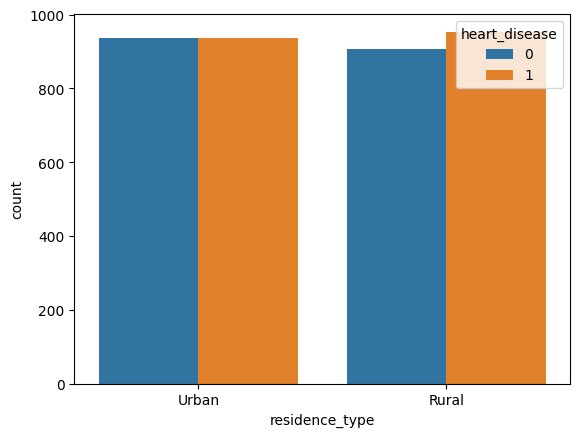

In [545]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="residence_type", hue="heart_disease", data=df)
plt.show()


In [546]:
df.drop('residence_type',inplace=True , axis=1)

In [547]:
df.columns

Index(['age', 'gender', 'chest_pain_type', 'blood_pressure', 'cholesterol',
       'max_heart_rate', 'exercise_angina', 'plasma_glucose', 'skin_thickness',
       'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease',
       'smoking_status'],
      dtype='object')

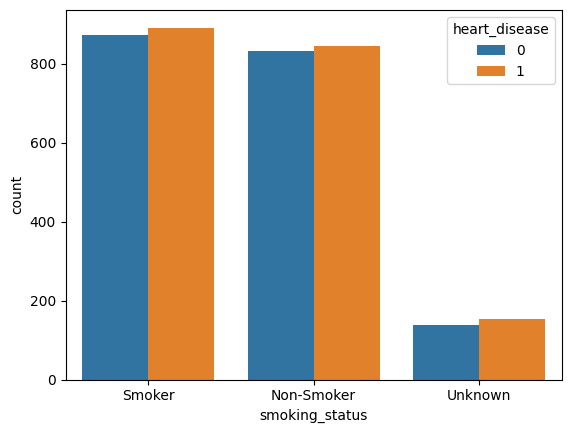

In [548]:
sns.countplot(x="smoking_status", hue="heart_disease", data=df)
plt.show()

In [549]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df['smoking_status'], df['heart_disease'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 0.5723480526532843
p-value: 0.7511318878488845


In [550]:
df_encoded = pd.get_dummies(df, drop_first=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

In [551]:
df.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Smoker
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Non-Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Smoker
5,63,1.0,3,18,154,107,0,103.0,67.0,102.0,22.373849,1.062411,0,0,Non-Smoker
7,37,1.0,4,263,201,201,0,186.0,21.0,180.0,35.663404,0.151236,0,0,Smoker


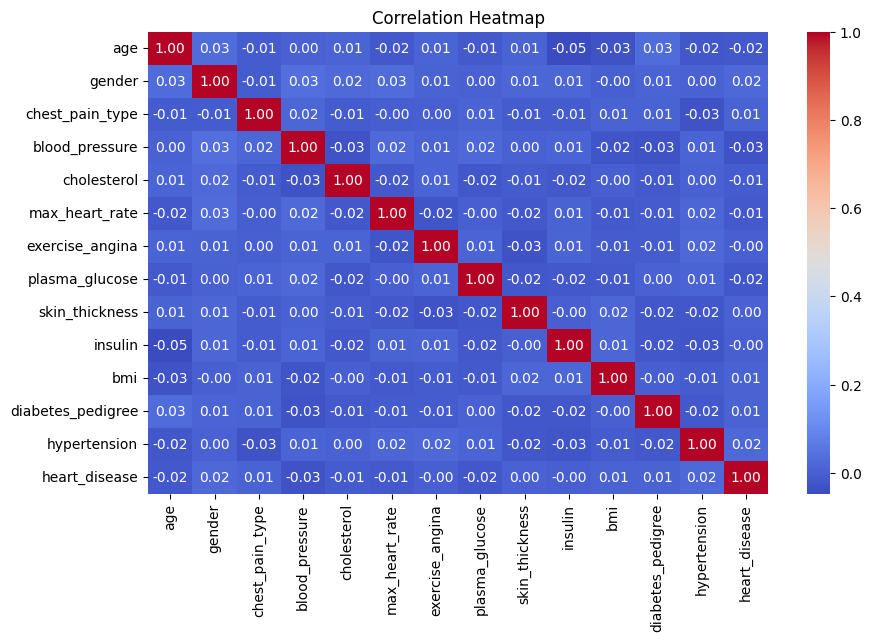

In [552]:
numeric_df = df.select_dtypes(include=['int64','float64'])

# Correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [553]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd

kmeans_results = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    
    kmeans_results.append({
        "k": k,
        "Silhouette": silhouette_score(X_scaled, labels),
        "Davies-Bouldin": davies_bouldin_score(X_scaled, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels)
    })

kmeans_df = pd.DataFrame(kmeans_results)
print(kmeans_df)

    k  Silhouette  Davies-Bouldin  Calinski-Harabasz
0   2    0.179827        1.951107         269.881229
1   3    0.077446        3.096189         267.080410
2   4    0.062606        3.147151         219.976401
3   5    0.067897        3.473842         198.448346
4   6    0.066270        3.324942         180.665203
5   7    0.058904        3.246810         157.684143
6   8    0.057500        2.912519         145.937220
7   9    0.061888        3.333526         138.883626
8  10    0.058816        2.908622         128.593128


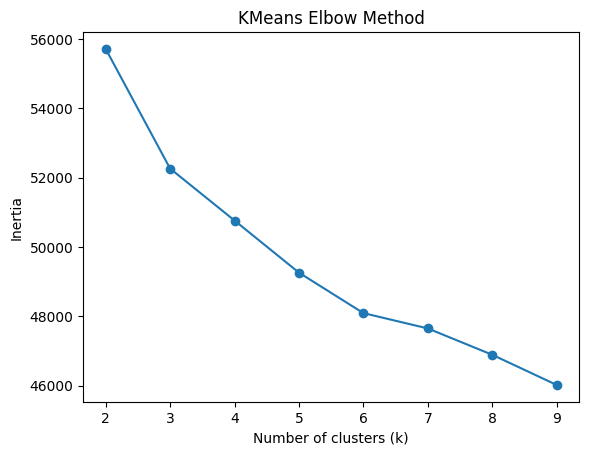

In [554]:
from sklearn.cluster import KMeans
import numpy as np


inertia = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)


plt.plot(K, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("KMeans Elbow Method")
plt.show()


kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)




In [555]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

kmeans_labels = df['kmeans_cluster']

print("Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans_labels))


Silhouette Score: 0.1798270526896042
Davies-Bouldin Index: 1.9511067768098522
Calinski-Harabasz Index: 269.88122877655553


In [556]:
from scipy.cluster.hierarchy import linkage, fcluster

hier_results = []
Z = linkage(X_scaled, method='ward')

for k in range(2, 11):
    labels = fcluster(Z, k, criterion='maxclust')
    hier_results.append({
        "k": k,
        "Silhouette": silhouette_score(X_scaled, labels),
        "Davies-Bouldin": davies_bouldin_score(X_scaled, labels),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels)
    })

hier_df = pd.DataFrame(hier_results)
print(hier_df)

    k  Silhouette  Davies-Bouldin  Calinski-Harabasz
0   2    0.179827        1.951107         269.881229
1   3    0.040171        4.420140         187.473582
2   4    0.033689        4.464643         152.169389
3   5    0.029749        4.142751         133.164107
4   6    0.026332        4.046363         120.610575
5   7    0.027866        3.786000         111.499886
6   8    0.026479        3.713125         104.948983
7   9    0.027307        3.766154          98.800984
8  10    0.025434        3.742003          93.161495


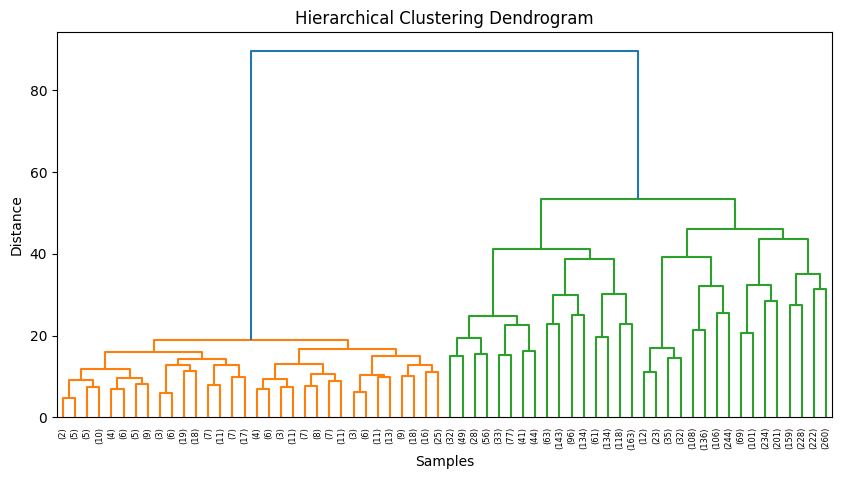

In [557]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

plt.figure(figsize=(10, 5))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [558]:



Z = linkage(X_scaled, method='ward')
df['hier_cluster'] = fcluster(Z, 2, criterion='maxclust')



In [559]:
hier_labels = df['hier_cluster']


print("Silhouette Score:", silhouette_score(X_scaled, hier_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, hier_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, hier_labels))


Silhouette Score: 0.1798270526896042
Davies-Bouldin Index: 1.9511067768098522
Calinski-Harabasz Index: 269.88122877655553


In [560]:
from sklearn.cluster import DBSCAN


dbscan_results = []

for eps in np.arange(0.5, 5, 0.5):
    for min_samples in [3, 5, 10]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

        

        if n_clusters > 1: 
            dbscan_results.append({
                "eps": eps,
                "min_samples": min_samples,
                "Silhouette": silhouette_score(X_scaled, labels),
                "Davies-Bouldin": davies_bouldin_score(X_scaled, labels),
                "Calinski-Harabasz": calinski_harabasz_score(X_scaled, labels)
            })


if dbscan_results:
    dbscan_df = pd.DataFrame(dbscan_results)
    print(dbscan_df.sort_values(by="Silhouette", ascending=False).head())
else:
    print(" No clusters found")

   eps  min_samples  Silhouette  Davies-Bouldin  Calinski-Harabasz
7  3.5            3    0.175863        4.298287         132.919588
8  3.5            5    0.174236        4.672792         132.499604
9  3.5           10    0.165332        5.332839         129.284263
6  3.0            5    0.063830        2.792744          24.932957
5  3.0            3    0.007374        2.386096          19.014377


dbscan_cluster
 0    3433
 1     282
-1      19
Name: count, dtype: int64


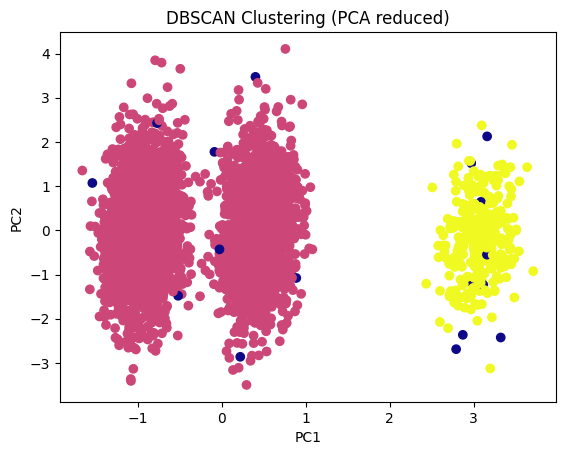

In [561]:

db = DBSCAN(eps=3.5, min_samples=3)
df['dbscan_cluster'] = db.fit_predict(X_scaled)

print(df['dbscan_cluster'].value_counts())

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1], c=df['dbscan_cluster'], cmap='plasma')
plt.title("DBSCAN Clustering (PCA reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [562]:
dbscan_labels = df['dbscan_cluster']


if len(set(dbscan_labels)) > 1:
    print("Silhouette Score:", silhouette_score(X_scaled, dbscan_labels))
    print("Davies-Bouldin Index:", davies_bouldin_score(X_scaled, dbscan_labels))
    print("Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, dbscan_labels))
else:
    print("only one cluster")


Silhouette Score: 0.1758629628690485
Davies-Bouldin Index: 4.2982872507483885
Calinski-Harabasz Index: 132.91958761144406


In [563]:


results = []


kmeans_labels = df['kmeans_cluster']
results.append({
    "Method": "KMeans",
    "Silhouette": silhouette_score(X_scaled, kmeans_labels),
    "Davies-Bouldin": davies_bouldin_score(X_scaled, kmeans_labels),
    "Calinski-Harabasz": calinski_harabasz_score(X_scaled, kmeans_labels)
})


hier_labels = df['hier_cluster']
results.append({
    "Method": "Hierarchical",
    "Silhouette": silhouette_score(X_scaled, hier_labels),
    "Davies-Bouldin": davies_bouldin_score(X_scaled, hier_labels),
    "Calinski-Harabasz": calinski_harabasz_score(X_scaled, hier_labels)
})


dbscan_labels = df['dbscan_cluster']
if len(set(dbscan_labels)) > 1:  
    results.append({
        "Method": "DBSCAN",
        "Silhouette": silhouette_score(X_scaled, dbscan_labels),
        "Davies-Bouldin": davies_bouldin_score(X_scaled, dbscan_labels),
        "Calinski-Harabasz": calinski_harabasz_score(X_scaled, dbscan_labels)
    })
else:
    results.append({
        "Method": "DBSCAN",
        "Silhouette": None,
        "Davies-Bouldin": None,
        "Calinski-Harabasz": None
    })


metrics_df = pd.DataFrame(results)

metrics_df


,Method,Silhouette,Davies-Bouldin,Calinski-Harabasz
0,KMeans,0.179827,1.951107,269.881229
1,Hierarchical,0.179827,1.951107,269.881229
2,DBSCAN,0.175863,4.298287,132.919588


In [565]:
import joblib


df = pd.read_csv("patient_dataset.csv")


df = df[df['smoking_status'] != 'Unknown'].copy()

X = df.select_dtypes(include=['int64','float64'])
X = X.dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)


joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']